In [1]:
library(ggplot2)

In [2]:
load("~/shared_scratch/group8/clustering_task/pbmc8k_pca.Rda")

In [16]:
tsne <- function(topDim_pca){
    ## Code from Monocle2
    set.seed(2016) 
    max_components=2
    tsne_res <- Rtsne::Rtsne(as.matrix(topDim_pca), dims = max_components, pca = F)

    tsne_data <- tsne_res$Y[, 1:max_components]
    row.names(tsne_data) <- colnames(tsne_data)
    
    dataDist <- dist(tsne_data)
    dataClust <- densityClust::densityClust(dataDist, gaussian = F) #gaussian = F

    rho_threshold <- quantile(dataClust$rho, probs = 0.95)
    delta_threshold <- quantile(dataClust$delta, probs = 0.95)

    dataClust <- densityClust::findClusters(dataClust, rho = rho_threshold, delta = delta_threshold, peaks=peaks)
    as.character(dataClust$clusters)
}

In [17]:
test <- tsne(pbmc8k.pca)

Distance cutoff calculated to 2.658979 


In [18]:
head(test)

clust,comp_1,comp_2
7,-37.209391,3.790532
24,-7.590493,20.749154
11,16.164048,-12.001555
10,3.818002,-23.519126
24,-7.356286,19.187878
24,-4.462063,22.502105


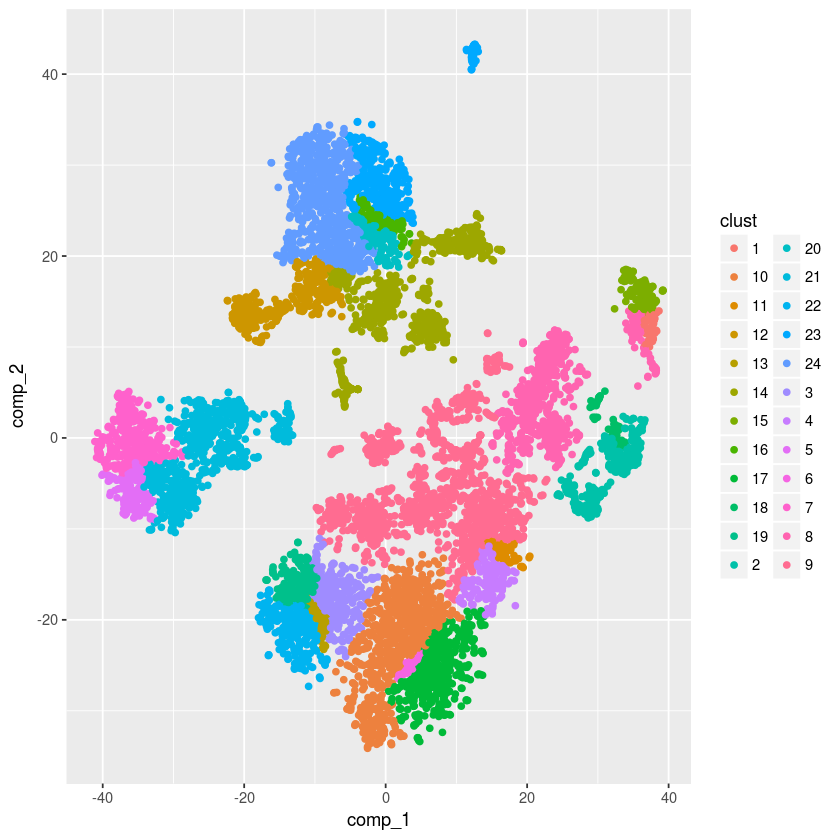

In [19]:
qplot(comp_1, comp_2, color = clust, data = test)

In [3]:
x <- read.table("~/jamboree/zeisel_2015/counts/expression_mRNA_17_Aug_2014.txt", skip=11, sep="\t")

In [4]:
head(x)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V2998,V2999,V3000,V3001,V3002,V3003,V3004,V3005,V3006,V3007
Tspan12,1,0,0,0,3,0,0,3,0,⋯,0,0,0,0,0,0,0,0,0,1
Tshz1,1,3,1,0,2,2,2,2,1,⋯,0,0,0,0,0,0,0,0,0,1
Fnbp1l,1,3,1,6,4,1,2,1,0,⋯,0,0,0,0,0,0,0,0,0,0
Adamts15,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Cldn12,1,1,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Rxfp1,1,0,0,0,0,0,1,0,0,⋯,0,0,0,2,0,0,0,0,0,0


In [5]:
dim(x)

[1] 19972  3007

In [6]:
library(reshape2)

In [7]:
x <- melt(x)

Using V1 as id variables


In [8]:
head(x)

V1,variable,value
Tspan12,V2,1
Tshz1,V2,1
Fnbp1l,V2,1
Adamts15,V2,1
Cldn12,V2,1
Rxfp1,V2,1


In [9]:
tail(x)

,V1,variable,value
60035827,Gm20865_loc4,V3007,0
60035828,Gm20738_loc4,V3007,0
60035829,Gm20738_loc6,V3007,0
60035830,Gm21943_loc1,V3007,0
60035831,Gm21943_loc3,V3007,0
60035832,Gm20738_loc3,V3007,0


In [10]:
x$V1 <- as.numeric(as.factor(x$V1))
x$variable <- as.numeric(as.factor(x$variable))

In [11]:
head(x)

V1,variable,value
18382,1,1
18369,1,1
6798,1,1
1635,1,1
4231,1,1
15328,1,1


In [17]:
write.table(x, file = "~/shared_scratch/group8/clustering_task/zeisel_2015_sparse_expression.txt", quote=FALSE, col.names=FALSE, row.names = FALSE, sep="\t")

In [13]:
library(scater)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain intro

In [23]:
library(SC3)
library(Matrix)

In [24]:
 mat <- readMM("~/jamboree/10x_pbmc/counts/from_10x/filtered_gene_bc_matrices/GRCh38/matrix.mtx")

In [25]:
sc3_run <- function(data.mat, cores=1) {
    ann <- data.frame(cell_name = paste0("cell_", 1:ncol(data.mat)))
    pd <- new("AnnotatedDataFrame", data = ann)
    #tmp <- as.matrix(data.mat)
    colnames(data.mat) <- rownames(ann)
    sceset <- newSCESet(fpkmData = data.mat, phenoData = pd, logExprsOffset = 1)
    sceset <- calculateQCMetrics(sceset)
    sceset
    #sceset <- sc3(sceset, ks = 2:3, biology = FALSE, n_cores = cores)
}

In [26]:
sceset <- sc3_run(mat, cores=1)

In [ ]:
sceset <- sc3(sceset, ks = 2:3, biology = FALSE, n_cores = 1)

Setting SC3 parameters...
Your dataset contains more than 2000 cells. Adjusting the nstart parameter of kmeans to 50 for faster performance...
Defining training cells for SVM using 5000 random cells...
Setting a range of k...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


In [ ]:
head(pData(sceset))

In [ ]:
nr

In [ ]:
sc3_interactive(sceset)

Columns 'filter_on_total_features', 'n_detected_feature_controls', 'fpkm_feature_controls', 'pct_fpkm_feature_controls', 'filter_on_pct_fpkm_feature_controls', 'log10_fpkm_feature_controls', 'is_cell_control' were excluded from annotation since they contained only a single value.
